In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv('data1.csv')
data.head()

,FT,FFR,CFR,N,W,L,FLUX
0,75.0,1,1.0,1,5,170.0,6.00
1,75.0,3,3.0,1,5,170.0,10.60
2,45.0,1,1.0,1,5,370.0,0.50
3,75.0,1,1.0,35,5,370.0,11.38
4,75.0,1,3.0,1,1,370.0,8.50


In [31]:
data.shape

(87, 7)

In [32]:
X1 = data[['FT','FFR','CFR','N','W','L']]
X1 = np.array(X1)

X1 = np.log(X1)

y1 = data['FLUX']
y1 = np.log(y1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=42)


y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)

(73, 6)
(14, 6)


# Perceptron

In [34]:
def forward_prop(X,y,w):
    
    #w[0]=k , w[1]=a , w[2]=b , w[3]=c ,w[4]=d ,w[5]=e, w[6]=f
    #X[0]=p1 , X[1]=p2, X[2]=p3, X[3]=p4, X[4]=p5, X[5]=p6
    '''
    x1 = w[0] * X[0]
    x2 = w[1] * X[1]
    x3 = w[2] * X[2]
    x4 = w[3] * X[3]
    x5 = w[4] * X[4]
    x6 = w[5] * X[5]'''
    
    y_hat = np.dot(w,X)
    
    
    L = (y-y_hat)**2
    
    dL = -2*(y-y_hat)
    
    dict = {
        'dL' : dL,
        'y_hat' : y_hat,
        'loss' : L
    }
    
    return dict

    

In [35]:
def back_prop(X,w,dict):
    
    
    z = dict['dL']
    
    da = z * X[0]
    db = z * X[1]
    dc = z * X[2]
    dd = z * X[3]
    de = z * X[4]
    df = z * X[5]
    
    dict_d = {
        'da':da,
        'db':db,
        'dc':dc,
        'dd':dd,
        'de':de,
        'df':df

    }
      
    return dict_d    

In [36]:
#test purpose
W =np.ones(6)*0.1

dict = forward_prop(X_train[0], y_train[0],W)
print(dict)

print(back_prop(X_train[0],W,dict))

{'dL': -2.2621431817054667, 'y_hat': 1.7593001670434312, 'loss': 1.2793229436341331}
{'da': -9.766776298130562, 'db': -2.4852182981484026, 'dc': -2.4852182981484026, 'dd': -8.042706375888026, 'de': -3.64077899999108, 'df': -13.377190504199396}


In [54]:
W = np.random.normal(loc=1, scale=1, size=6) 
#W =np.ones(7)*0.5
epoch = 5000
learning_rate = 0.001
loss_sgd_tr = []
loss_sgd_te = []
epochs = []


for i in range (epoch):
    #print('epoch {}'.format(i+1))
    loss = 0
    loss1 = 0
    for j in range(len(X_train)):
        forward = forward_prop(X_train[j],y_train[j],W)
        loss += forward['loss']
        #print(X[j])
        #print('forward' , forward)
    
        backward = back_prop(X_train[j],W,forward)
        dw = list(backward.values())
        #print('backward' ,dw)
        W = W - (learning_rate * np.array(dw))
        #print('W',W)
    for k in range(len(X_test)):
        forward = forward_prop(X_test[k],y_test[k],W)
        loss1 += forward['loss']

    loss_sgd_tr.append(loss/len(X_train))
    loss_sgd_te.append(loss/len(X_test))
    epochs.append(i)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_sgd_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_sgd_te[-1]))
#print('epoch:',epochs)
#print(W)

Train loss at the end of 5000 epoch is : 1.9211520591803652
Test loss at the end of 5000 epoch is : 10.017435737154761


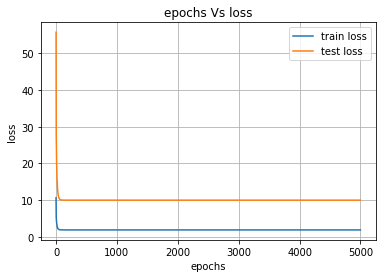

In [55]:
plt.plot(epochs,loss_sgd_tr,label = 'train loss')
plt.plot(epochs,loss_sgd_te,label = 'test loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()

In [56]:
W

array([ 0.62987159, -0.14663387,  0.32099864,  0.0463321 ,  0.40955925,
       -0.30065567])

# Momentum

In [57]:
W = np.random.normal(loc=0.1, scale=0.1, size=6) 
vdw = np.zeros(6)
#W =np.ones(7)*0.5
epoch = 5000
learning_rate = 0.001
loss_momt_tr = []
loss_momt_te = []
epochs = []
beta = 0.5


for i in range (epoch):
    #print('epoch {}'.format(i+1))
    loss = 0
    loss1 = 0
    for j in range(len(X_train)):
        forward = forward_prop(X_train[j],y_train[j],W)
        loss += forward['loss']
        #print(X[j])
        #print('forward' , forward)
    
        backward = back_prop(X_train[j],W,forward)
        dw = list(backward.values())
        #print('backward' ,dw)
        vdw = (beta * vdw) + ((1-beta)*np.array(dw))
        W = W - (learning_rate *vdw)
        
        #print('W',W)
    for k in range(len(X_test)):
        forward = forward_prop(X_test[k],y_test[k],W)
        loss1 += forward['loss']

    loss_momt_tr.append(loss/len(X_train))
    loss_momt_te.append(loss/len(X_test))
    epochs.append(i)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_momt_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_momt_te[-1]))
#print('epoch:',epochs)
#print(W)

Train loss at the end of 5000 epoch is : 1.9375140436752143
Test loss at the end of 5000 epoch is : 10.102751799163617


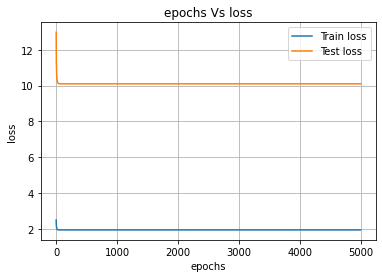

In [58]:
plt.plot(epochs,loss_momt_tr,label = 'Train loss')
plt.plot(epochs,loss_momt_te,label = 'Test loss')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()


In [59]:
W

array([ 0.62301614, -0.16297852,  0.32600203,  0.03942831,  0.39786653,
       -0.31072881])

In [55]:
np.save('W_momt.npy', W)

## adam

In [50]:
W = np.random.normal(loc=0.1, scale=0.1, size=6) 
vdw = np.zeros(6)
sdw = np.zeros(6)
epoch = 500
learning_rate = 0.0001
weights = []

epochs = []
beta1 = 0.9
beta2 = 0.99
eps = 0.000001
#print(W)
#for k in range (len(X)):
  #forward = forward_propagation(X[k],y[k],W)
  #loss = forward['loss']

#print('initial loss',loss)
loss_adam_tr = []
loss_adam_te = []

for i in range (epoch):
  loss = 0
  loss1 = 0
  #print('epoch {}'.format(i+1))
  for j in range (len(X_train)):

    forward = forward_prop(X_train[j],y_train[j],W)
    loss = forward['loss']
    backward = back_prop(X_train[j],W,forward)
    #print(backward)
    dw = list(backward.values())
    vdw = (beta1 * vdw) + ((1-beta1) * np.array(dw))
    #s = np.array(dw)**2
    #print(s)
    sdw = (beta2 * sdw) + ((1-beta2)* np.array(dw)**2)
    #print(sdw)
    v_hat = vdw / (1-beta1**(j+1))
    s_hat = sdw / (1-beta2**(j+1))
    #print(s_hat)
    #sq = (s_hat)**0.5
    #print(sq)
   # add = sq + eps
    W = W - ((learning_rate* v_hat)/((s_hat)**0.5 + eps))

    for k in range(len(X_test)):
      forward = forward_prop(X_test[k],y_test[k],W)
      loss1 += forward['loss']
    
    
  loss_adam_tr.append(loss/len(X_train))
  loss_adam_te.append(loss1/len(X_test))
  epochs.append(i)
  #print(loss_adam)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_adam_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_adam_te[-1]))
#print('epoch:',epochs)



Train loss at the end of 500 epoch is : 0.02217999349682129
Test loss at the end of 500 epoch is : 146.4506281859261


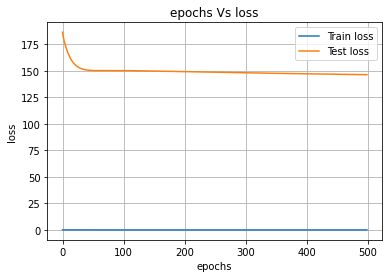

In [51]:
plt.plot(epochs,loss_adam_tr,label = 'Train loss')
plt.plot(epochs,loss_adam_te,label = 'Test loss')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()


# MLP

In [52]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation

    return (1/(1+np.exp(-z)))

def forward_prop1(X,y,W1,W2):
    
    
    #z11 = W1[:,0][0]*X[0] + W1[:,0][1]*X[1] + W1[:,0][2]*X[2] + W1[:,0][3]*X[3] + W1[:,0][4]*X[4] + W1[:,0][5]*X[5]
    #z12 = W1[:,1][0]*X[0] + W1[:,1][1]*X[1] + W1[:,1][2]*X[2] + W1[:,1][3]*X[3] + W1[:,1][4]*X[4] + W1[:,1][5]*X[5]
    #z13 = W1[:,2][0]*X[0] + W1[:,2][1]*X[1] + W1[:,2][2]*X[2] + W1[:,2][3]*X[3] + W1[:,2][4]*X[4] + W1[:,2][5]*X[5]
    #print(X[0])
    z11,z12,z13 = np.dot(np.transpose(W1),X.reshape(-1,1))
    #print(s)
    
    #z11 = s[0]
    #z12 = s[1]
    #z13 = s[2]
    
    o11 = sigmoid(z11)
    o12 = sigmoid(z12)
    o13 = sigmoid(z13)
    
    
    y_hat = o11*W2[0] + o12*W2[1] + o13*W2[2]
    
    L = (y-y_hat)**2
    
    dL = -2*(y-y_hat)
    
    dict = {
        'dL' : dL,
        'y_hat' : y_hat,
        'loss' : L,
        'o11' : o11,
        'o12' : o12,
        'o13' : o13
    }
    
    return dict

In [53]:
def back_prop1(X,W1,W2,dict):
    
    w1 = []
    w2 = []
    w3 = []
    
    dW112 = dict['dL'] * dict['o11']
    dW212 = dict['dL'] * dict['o12']
    dW312 = dict['dL'] * dict['o13']
    
    a = dict['dL'] * W2[0] * dict['o11'] * (1 - dict['o11'])
    b = dict['dL'] * W2[1] * dict['o12'] * (1 - dict['o12'])
    c = dict['dL'] * W2[2] * dict['o13'] * (1 - dict['o13'])
    '''
    dW111 = a * X[0]
    dW211 = a * X[1]
    dW311 = a * X[2]
    dW411 = a * X[3]
    dW511 = a * X[4]
    dW611 = a * X[5]
    
    dW121 = b * X[0]
    dW221 = b * X[1]
    dW321 = b * X[2]
    dW421 = b * X[3]
    dW521 = b * X[4]
    dW621 = b * X[5]
    
    dW131 = c * X[0]
    dW231 = c * X[1]
    dW331 = c * X[2]
    dW431 = c * X[3]
    dW531 = c * X[4]
    dW631 = c * X[5]'''
    
    
    for i in range(len(X)):
        w1.append(a[0] * X[i])
        w2.append(b[0] * X[i])
        w3.append(c[0] * X[i])
        
    w1 = np.array(w1).reshape(-1,1)
    w2 = np.array(w2).reshape(-1,1)
    w3 = np.array(w3).reshape(-1,1)
    
    w11= np.hstack((w1,w2,w3))
    
    w22 = np.array([dW112,dW212,dW312]).reshape(-1,1)
    
    return w11 , w22
    
    

In [56]:
W1 = np.random.normal(0.1,0.2, size=(6,3))
W2 = np.random.normal(0.1,0.2, size=(3,1))
#W =np.ones(7)*0.5
epoch = 2500
learning_rate = 0.001
loss_sgd_tr = []
loss_sgd_te = []
epochs = []


for i in range (epoch):
    #print('epoch {}'.format(i+1))
    loss = 0
    loss1 = 0
    for j in range (len(X_train)):
        forward = forward_prop1(X_train[j],y_train[j],W1,W2)
        loss += forward['loss']
        #print(X[j])
        #print('forward' , forward)
    
        w11 , w22 = back_prop1(X_train[j],W1,W2,forward)
        #dw = list(backward.values())
        #print('backward' ,dw)
        W1 = W1 - (learning_rate * w11)
        W2 = W2 - (learning_rate * w22)
        #print('W',W)
    for k in range(len(X_test)):
        forward = forward_prop1(X_test[k],y_test[k],W1,W2)
        loss1 += forward['loss']
        
    loss_sgd_tr.append(loss/len(X_train))
    loss_sgd_te.append(loss1/len(X_test))
    epochs.append(i)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_sgd_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_sgd_te[-1]))
#print('epoch:',epochs)
#print(W)

Train loss at the end of 2500 epoch is : [0.57572962]
Test loss at the end of 2500 epoch is : [0.62439226]


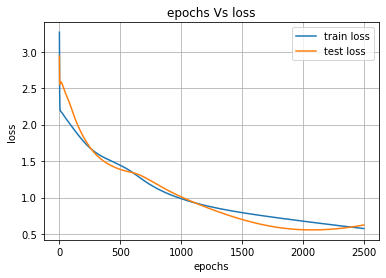

In [57]:
plt.plot(epochs,loss_sgd_tr,label = 'train loss')
plt.plot(epochs,loss_sgd_te,label = 'test loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()

In [58]:
W1 

array([[ 3.05495243,  1.11312164,  5.16632747],
       [ 0.22304865, -0.33692103,  0.01947535],
       [ 0.40597768,  0.30966646,  1.27061079],
       [ 0.53149111,  0.85614165, -5.77757101],
       [-0.39578015,  0.41121506,  3.09335941],
       [-2.28254174,  0.6967693 , -0.05271692]])

In [59]:
W2

array([[ 3.10232909],
       [-6.73636464],
       [ 6.33608892]])

In [60]:
np.save('W1.npy', W1)
np.save('W2.npy', W2)
np.save('W.npy', W)

# Momentum


In [78]:
W1 = np.random.normal(0.1,0.2, size=(6,3))
W2 = np.random.normal(0.1,0.2, size=(3,1))
#W =np.ones(7)*0.5
epoch = 2500
learning_rate = 0.001
loss_momt_tr = []
loss_momt_te = []
epochs = []
vdw1 = np.zeros((6,3))
vdw2 = np.zeros((3,1))

epochs = []
beta = 0.5
for i in range (epoch):
  #print('epoch {}'.format(i+1))
  loss = 0 
  loss1 = 0
  for j in range (len(X_train)):
    forward = forward_prop1(X_train[j],y_train[j],W1,W2)
    loss += forward['loss']
    w11 , w22 = back_prop1(X_train[j],W1,W2,forward)
    
    vdw1 = (beta * vdw1) + ((1-beta)*w11)
    vdw2 = (beta * vdw2) + ((1-beta)*w22)
    W1 = W1 - (learning_rate *vdw1)
    W2 = W2 - (learning_rate *vdw2)
    
  for k in range(len(X_test)):
      forward = forward_prop1(X_test[k],y_test[k],W1,W2)
      loss1 += forward['loss']
        
  loss_momt_tr.append(loss/len(X_train))
  loss_momt_te.append(loss1/len(X_test))
  epochs.append(i)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_momt_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_momt_te[-1]))
#print('epoch:',epochs)
#print(W)
#print(vdw)

Train loss at the end of 2500 epoch is : [0.5899542]
Test loss at the end of 2500 epoch is : [0.58616308]


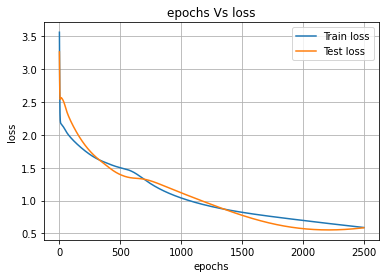

In [79]:
plt.plot(epochs,loss_momt_tr,label = 'Train loss')
plt.plot(epochs,loss_momt_te,label = 'Test loss')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()


In [80]:
W1

array([[ 5.03570446,  1.11124493,  3.06388173],
       [-0.03942352,  0.32370781,  0.21624785],
       [ 1.18675019,  0.02168453,  0.42846768],
       [-5.62390449,  0.69467412,  0.52986892],
       [ 3.09605612,  0.48796148, -0.4179648 ],
       [-0.05000243,  0.67299477, -2.28907803]])

In [81]:
W2

array([[ 6.20991942],
       [-6.60087694],
       [ 3.08921726]])

In [84]:
np.save('W1_momt.npy', W1)
np.save('W2_momt.npy', W2)


# Adam

In [114]:
W1 = np.random.normal(0.1,0.2, size=(6,3))
W2 = np.random.normal(0.1,0.2, size=(3,1)) 
vdw1 = np.zeros((6,3))
vdw2 = np.zeros((3,1))
sdw1 = np.zeros((6,3))
sdw2 = np.zeros((3,1))
epoch = 500
learning_rate = 0.0001
weights = []

epochs = []
beta1 = 0.8
beta2 = 0.99
eps = 0.000001
#print(W)
#for k in range (len(X)):
  #forward = forward_propagation(X[k],y[k],W)
  #loss = forward['loss']

#print('initial loss',loss)
loss_adam_tr = []
loss_adam_te = []

for i in range (epoch):
  #print('epoch {}'.format(i+1))
  for j in range (len(X_train)):

    forward = forward_prop1(X_train[j],y_train[j],W1,W2)
    loss = forward['loss']
    w11 , w22 = back_prop1(X_train[j],W1,W2,forward )
    #print(backward)
    vdw1 = (beta1 * vdw1) + ((1-beta1) * np.array(w11))
    vdw2 = (beta1 * vdw2) + ((1-beta1) * np.array(w22))
    #s = np.array(dw)**2
    #print(s)
    sdw1 = (beta2 * sdw1) + ((1-beta2)* np.array(w11)**2)
    sdw2 = (beta2 * sdw2) + ((1-beta2)* np.array(w22)**2)
    #print(sdw)
    v_hat1 = vdw1 / (1-beta1**(j+1))
    v_hat2 = vdw2 / (1-beta1**(j+1))
    s_hat1 = sdw1 / (1-beta2**(j+1))
    s_hat2 = sdw2 / (1-beta2**(j+1))
    #print(s_hat)
    #sq = (s_hat)**0.5
    #print(sq)
   # add = sq + eps
    W1 = W1 - ((learning_rate* v_hat1)/((s_hat1)**0.5 + eps))
    W2 = W2 - ((learning_rate* v_hat2)/((s_hat2)**0.5 + eps))


  for k in range(len(X_test)):
    forward = forward_prop1(X_test[k],y_test[k],W1,W2)
    loss1 += forward['loss']   
    
  loss_adam_tr.append(loss/len(X_train))
  loss_adam_te.append(loss/len(X_test))
  #weights.append(W)
  epochs.append(i)
  #print(loss_adam)

print('loss at the end of {} epoch is : {}'.format(epoch,loss_adam_tr[-1]))
print('loss at the end of {} epoch is : {}'.format(epoch,loss_adam_te[-1]))
#print('epoch:',epochs)


loss at the end of 500 epoch is : [0.02389952]
loss at the end of 500 epoch is : [0.12461893]


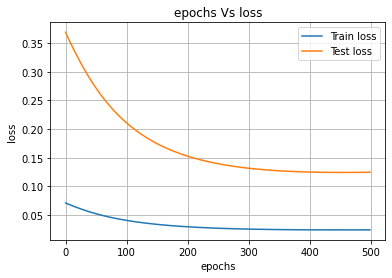

In [115]:
plt.plot(epochs,loss_adam_tr,label = 'Train loss')
plt.plot(epochs,loss_adam_te,label = 'Test loss')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()


In [124]:
np.save('W1_adam.npy', W1)
np.save('W2_adam.npy', W2)
np.save('W_adam.npy', W)

# Deploy Model

In [3]:

!pip install streamlit


!pip install pyngrok

     |████████████████████████████████| 8.2MB 5.3MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 112kB 41.7MB/s 
     |████████████████████████████████| 163kB 47.3MB/s 
     |████████████████████████████████| 4.6MB 38.1MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 122kB 38.1MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=ad0011015c8eeb9efd3421dea5f6877331d88cb6bea16e1d1ead90ea4e8d1ec1
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 6.6MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=185377fc3da8248a28374d618d75ea6844a0a93c0f43ee94399d9b285bcae8ef
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [97]:

%%writefile app.py 

import numpy as np
import streamlit as st

W1 = np.load('/content/W1_momt.npy')
W2 = np.load('/content/W2_momt.npy')
W3 =  np.load('/content/W_momt.npy')



def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation

    return (1/(1+np.exp(-z)))

def predict_flux(X,W1,W2):
    X1= np.log(X)
    z11,z12,z13 = np.dot(np.transpose(W1),X1.reshape(-1,1))
    o11 = sigmoid(z11)
    o12 = sigmoid(z12)
    o13 = sigmoid(z13)
    y_hat = o11*W2[0] + o12*W2[1] + o13*W2[2]

    return np.exp(y_hat[0])


def perceptron_predict_flux(X,W):
    X1 = np.log(X)
    y_hat = np.dot(np.transpose(W),X1.reshape(-1,1))
    return np.exp(y_hat[0])

def main():
    st.title("FLUX Prediction")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit FLUX Prediction ANN  </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    FT = st.number_input("FT :")
    FFR = st.number_input("FFR :")
    CFR = st.number_input("CFR :")
    N = st.number_input("N :")
    W = st.number_input("W :")
    L = st.number_input("L :")

    X = np.array([FT,FFR,CFR,N,W,L])
    ann = ["Perceptron", "Multilayer Perceptron"]
    opt = st.radio('Select Type of ANN',ann)

    result=""

    if opt == 'Perceptron':
      if st.button("Predict"):
        result = perceptron_predict_flux(X,W3)
        #print(result)
      st.success('The FLUX is : {}'.format(result))

    if opt == 'Multilayer Perceptron':
      if st.button("Predict"):
        result = predict_flux(X,W1,W2)
      st.success('The FLUX is : {}'.format(result))
    



if __name__=='__main__':
    main()

Overwriting app.py


In [98]:
from pyngrok import ngrok
#connecting to port = 80
public_url = ngrok.connect(port=80)
print (public_url)

NgrokTunnel: "http://2e8c5c8c12b7.ngrok.io" -> "http://localhost:80"


In [99]:
!export STREAMLIT_SERVER_PORT=80
#running Script using streamlit:
!streamlit run app.py --server.port 80

2021-04-09 08:02:11.843 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.223.111.253:80

  Stopping...
